Establish a relationship between:
1. price and house size
2. price and views - *done*
3. price and condition

Overall Questions:
1. What is the biggest influence on price?
2. Are more expensive houses an easier sell?

Increasing Views:
1. Views vs Price
2. Views vs Grade
3. Views cs condition

House Specs:
1. Size of living space vs Size of lot
2. Floors vs living space
3. House condition vs grade
4. How recently revovated vs views 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import random
import sklearn
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
def remove_outlier(df_in, col_name):
   q1 = df_in[col_name].quantile(0.25)
   q3 = df_in[col_name].quantile(0.75)
   iqr = q3-q1 #Interquartile range
   fence_low  = q1 - 1.5*iqr
   fence_high = q3 + 1.5*iqr
   df_out = df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
   return df_out

In [5]:
price_drop = remove_outlier(df, 'price').index
df.drop(index= price_drop, inplace= True)

sqft_living_drop = remove_outlier(df, 'sqft_living').index
df.drop(index= sqft_living_drop, inplace= True)

sqft_living15_drop = remove_outlier(df, 'sqft_living15').index
df.drop(index= sqft_living15_drop, inplace= True)

sqft_lot_drop = remove_outlier(df, 'sqft_lot').index
df.drop(index= sqft_lot_drop, inplace= True)

sqft_lot15_drop = remove_outlier(df, 'sqft_lot15').index
df.drop(index= sqft_lot15_drop, inplace= True)

In [6]:
df.dropna(subset=['view'], how='all', inplace=True)

In [7]:
df.drop(columns='waterfront', axis=1, inplace= True)

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
data_df = df[(df['grade'] >=8) & (df['condition'] >=4) & (df['bedrooms'] >=2)]

In [10]:
data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
24,3814700200,2014-11-20,329000.0,3,2.25,2450,6500,2.0,0.0,4,8,2450,0.0,1985,0.0,98030,47.3739,-122.172,2200,6865
27,3303700376,2014-12-01,667000.0,3,1.00,1400,1581,1.5,0.0,5,8,1400,0.0,1909,0.0,98112,47.6221,-122.314,1860,3861
33,7589200193,2014-11-10,535000.0,3,1.00,1090,3000,1.5,0.0,4,8,1090,0.0,1929,0.0,98117,47.6889,-122.375,1570,5080
37,2768000400,2014-12-30,640000.0,4,2.00,2360,6000,2.0,0.0,4,8,2360,0.0,1904,0.0,98107,47.6702,-122.362,1730,4700
47,4178300310,2014-07-16,785000.0,4,2.50,2290,13416,2.0,0.0,4,9,2290,0.0,1981,0.0,98007,47.6194,-122.151,2680,13685


In [11]:
# display(df.info())
# df.describe()

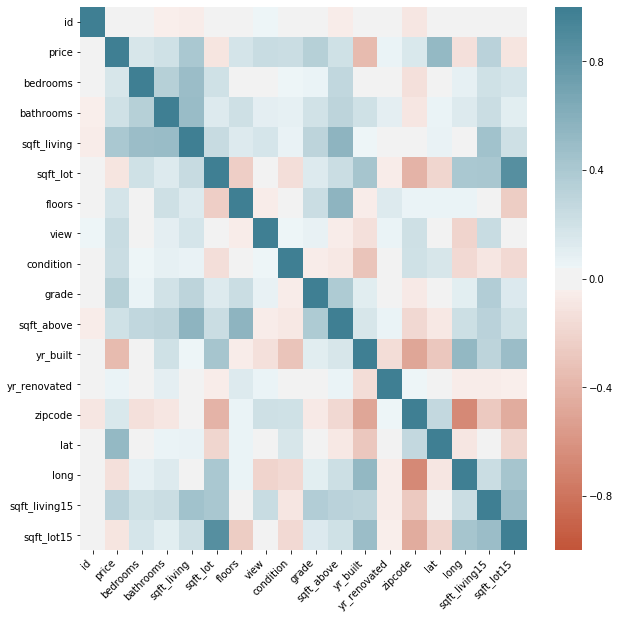

In [12]:
corr = data_df.corr()

plt.figure(figsize = (10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=False
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [117]:
#data_df.isna().any()

In [118]:
#data_df.isna().sum()

In [119]:
#data_df.isnull().sum()

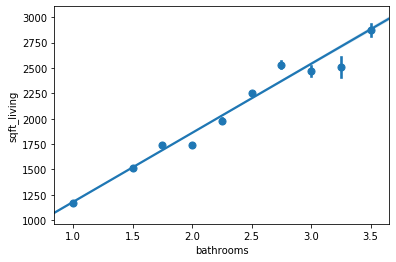

In [164]:
x = df['bathrooms']
y = df['sqft_living']
 
sns.regplot(x, y, x_bins = 50)
 
plt.show()
 

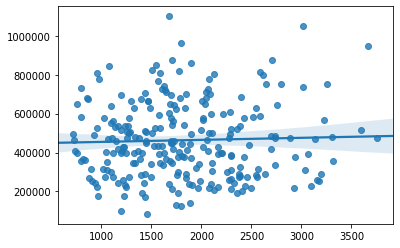

In [121]:
x = random.sample(list(df['sqft_living']), k=250)
y = random.sample(list(df['price']), k=250)

sns.regplot(x, y)
plt.show()


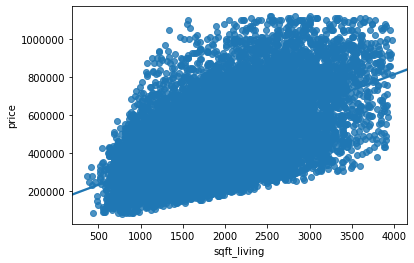

In [122]:
x = df['sqft_living']
y = df['price']

sns.regplot(x, y)
plt.show()

<BarContainer object of 17288 artists>

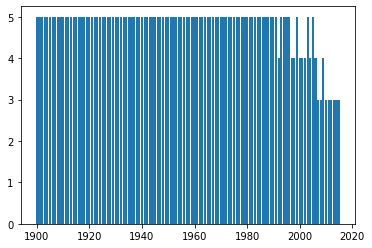

In [123]:
x = df['yr_built']
y = df['condition']
 
plt.bar(x, y) 

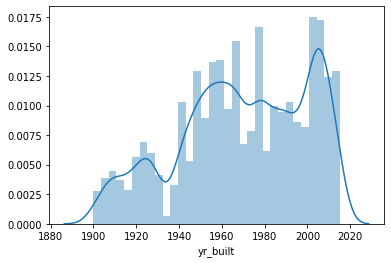

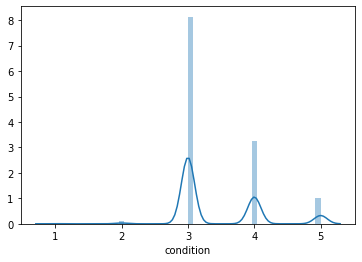

In [124]:
x = df['yr_built']
y = df['condition']
 
sns.distplot(x)
plt.show()

sns.distplot(y)
plt.show()


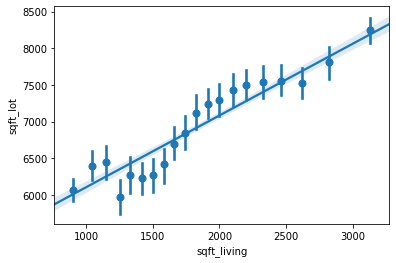

In [156]:
x = df['sqft_living']
y = df['sqft_lot']

sns.regplot(x , y, x_bins = 20)
plt.show()

In [126]:
import folium

def generateBaseMap(default_location=[47.6062, -122.3321], default_zoom_start=12):
   base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
   return base_map

generateBaseMap()

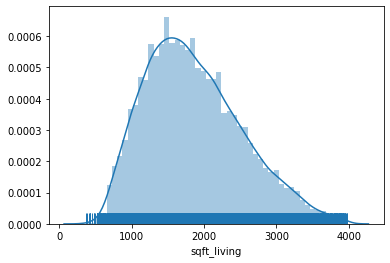

In [127]:
sns.distplot( df['sqft_living'], rug = True )
plt.show()

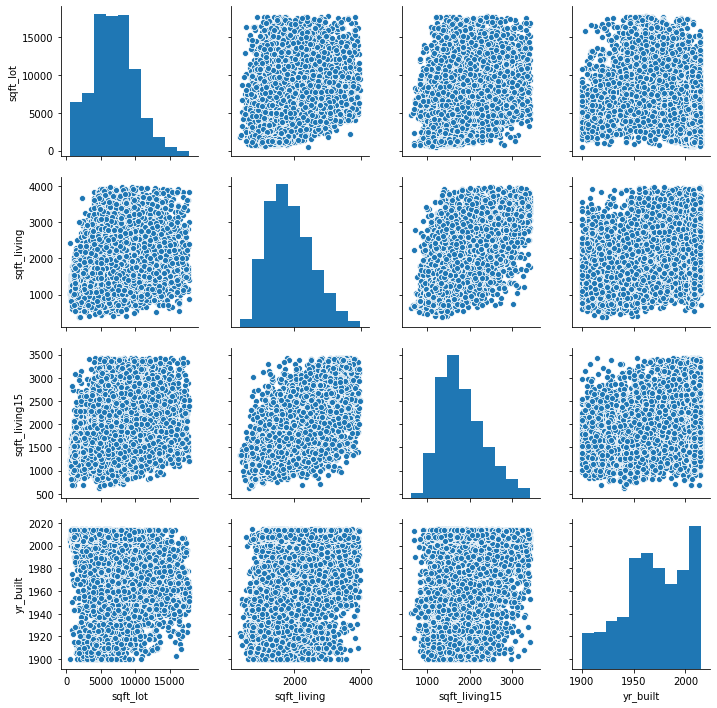

In [16]:
house_lot_plot = sns.pairplot(df,
                             vars=['sqft_lot','sqft_living','sqft_living15', 'yr_built'
                                  ])

plt.show()

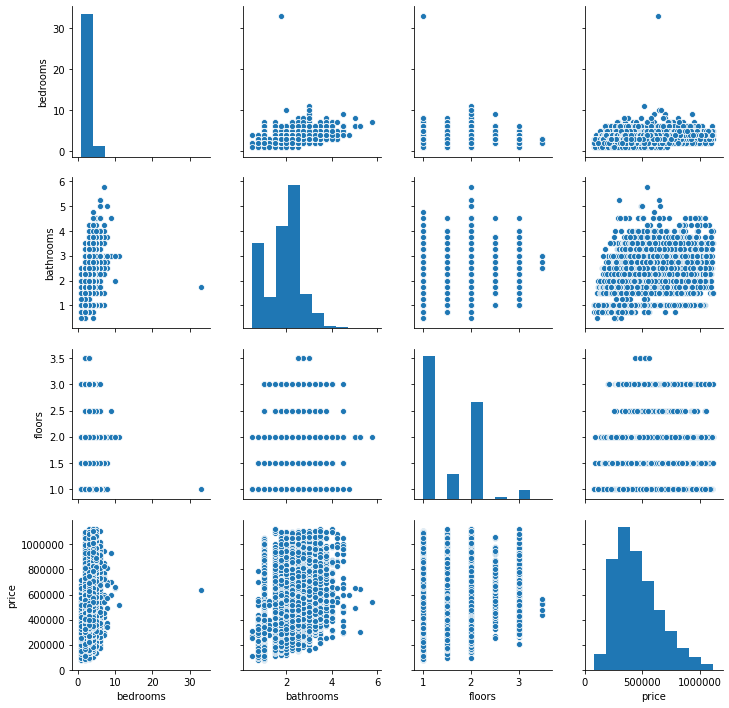

In [129]:
bedrooms_bathrooms_floors_plot = sns.pairplot(df,
                                              vars=['bedrooms','bathrooms', 'floors','price'
                                              ])
plt.show()

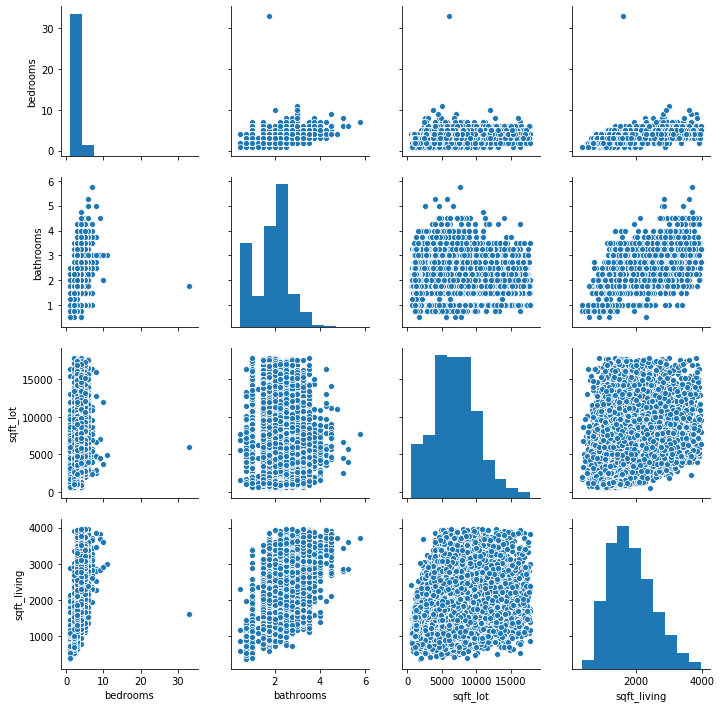

In [130]:
house_lot_plot = sns.pairplot(df,
                 vars=['bedrooms','bathrooms', 'sqft_lot', 'sqft_living'
                      ])
plt.show()

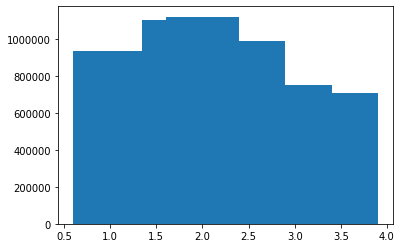

In [131]:
x = random.sample(list(df['bathrooms']), k=250)
y = random.sample(list(df['price']), k=250)

plt.bar(x, y)
plt.show()

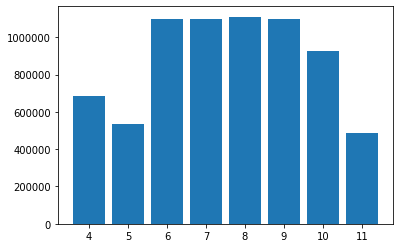

In [132]:
x = random.sample(list(df['grade']), k=1000)
y = random.sample(list(df['price']), k=1000)

plt.bar(x, y)
plt.show()

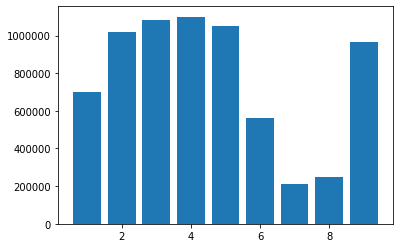

In [133]:
x = random.sample(list(df['bedrooms']), k=1000)
y = random.sample(list(df['price']), k=1000)

plt.bar(x, y)
plt.show()

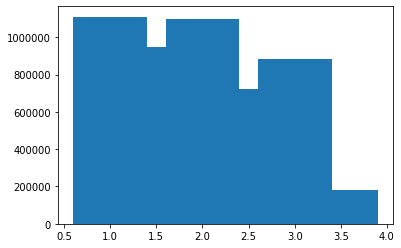

In [134]:
x = random.sample(list(df['floors']), k=1000)
y = random.sample(list(df['price']), k=1000)

plt.bar(x, y)
plt.show()

In [135]:
len(df['zipcode'].unique())

70

In [143]:
df2 = data_df.groupby('zipcode')['zipcode'].count()
pd.DataFrame(df2)
df2.sort_values(ascending=False, inplace=True)
list(df2.head().keys())

[98006, 98052, 98040, 98023, 98008]

In [144]:
x = df['sqft_living']
y = df['price']
X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     8078.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:38:41   Log-Likelihood:            -2.3199e+05
No. Observations:               17288   AIC:                         4.640e+05
Df Residuals:                   17286   BIC:                         4.640e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.485e+05   3664.061     40.539      0.000    1.41e+05    1.56e+05
sqft_living   166.3940      1.851     89.876      0.000     162.765     170.023
==============================================================================
Omnibus:                      856.091   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              986.940
Skew:                           0.579   Prob(JB):                    4.88e-215
Kurtosis:                       3.177   Cond. No.                     5.86e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [138]:
#FOR Q2

x = df['sqft_living']
y = df['bathrooms']
X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

#FIGURE OUT HOW TO PLOT!

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              bathrooms   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 1.617e+04
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:37:04   Log-Likelihood:                -12257.
No. Observations:               17288   AIC:                         2.452e+04
Df Residuals:                   17286   BIC:                         2.453e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6782      0.011     61.277      0.000       0.657       0.700
sqft_living     0.0007   5.59e-06    127.164      0.000       0.001       0.001
==============================================================================
Omnibus:                      561.448   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              708.301
Skew:                           0.379   Prob(JB):                    1.56e-154
Kurtosis:                       3.639   Cond. No.                     5.86e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

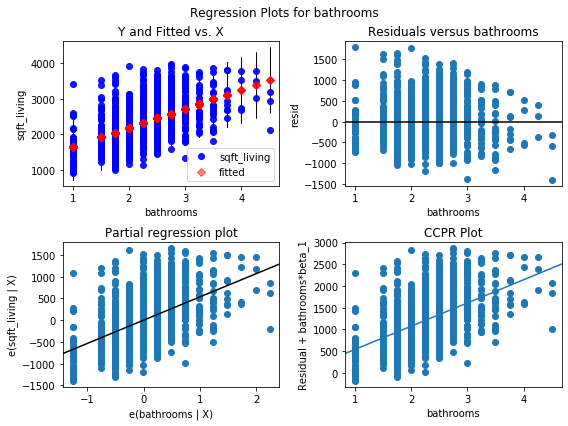

In [151]:
#graph for Q1
fig = plt.figure(figsize=(8, 6))
model = smf.ols('sqft_living ~ bathrooms', data=data_df).fit()
sm.graphics.plot_regress_exog(model, fig=fig, exog_idx='bathrooms')
plt.show()


In [ ]:
x = data_df['sqft_living']
y = data_df['sqft_living15']

sns.regplot(x, y)
plt.show()


In [ ]:

#graph for Q2
fig = plt.figure(figsize=(8, 6))
model = smf.ols('sqft_living ~ sqft_living15', data=data_df).fit()
sm.graphics.plot_regress_exog(model, fig=fig, exog_idx='sqft_living15')
plt.show()

In [ ]:
x = data_df['sqft_living']
y = data_df['bathrooms']

plt.bar(x,y)
plt.show()

In [ ]:
x = random.sample(list(df['sqft_living']), k=100)
y = random.sample(list(df['bathrooms']), k=100)

ax = sns.boxplot(x, y, data=data_df)

In [ ]:
x = df['sqft_living15']
y = df['grade']
X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

In [153]:
x = data_df['sqft_living']
y = data_df['sqft_living15']
X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          sqft_living15   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     424.8
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           3.44e-84
Time:                        14:15:03   Log-Likelihood:                -12188.
No. Observations:                1657   AIC:                         2.438e+04
Df Residuals:                    1655   BIC:                         2.439e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1340.6884     40.715     32.928      0.000    1260.830    1420.547
sqft_living     0.3530      0.017     20.610      0.000       0.319       0.387
==============================================================================
Omnibus:                       10.430   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               12.326
Skew:                          -0.110   Prob(JB):                      0.00211
Kurtosis:                       3.361   Cond. No.                     1.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [152]:
x = data_df['sqft_lot']
y = data_df['sqft_lot15']
X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sqft_lot15   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     4849.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:14:44   Log-Likelihood:                -14374.
No. Observations:                1657   AIC:                         2.875e+04
Df Residuals:                    1655   BIC:                         2.876e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1852.6248     97.142     19.071      0.000    1662.090    2043.159
sqft_lot       0.7517      0.011     69.637      0.000       0.731       0.773
==============================================================================
Omnibus:                      227.733   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1948.995
Skew:                          -0.341   Prob(JB):                         0.00
Kurtosis:                       8.269   Cond. No.                     2.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
data_df

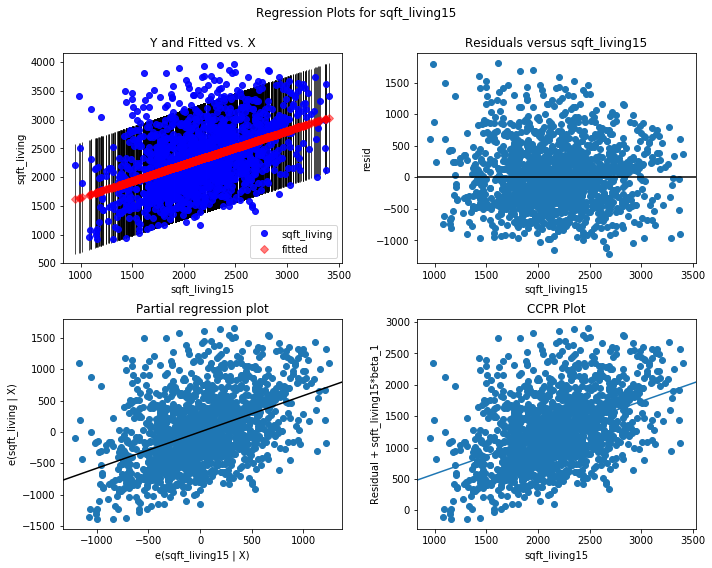

In [157]:
#graph for Q1
fig = plt.figure(figsize=(10, 8))
model = smf.ols('sqft_living ~ sqft_living15', data=data_df).fit()
sm.graphics.plot_regress_exog(model, fig=fig, exog_idx='sqft_living15')
plt.show()